#### 기본적인 ML 모델링

In [1]:
import sys
import pandas as pd

# 사용할 모델
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from freeman.plt_setting import plt_settings
from freeman.evaluation import regression_evaluation, f_importances, plot_actual_pred

sys.path.append('..')
from utils.data_manager import read_data

# 한글처리 지원
plt_settings()

#### 데이터 불러오기

In [2]:
df_data = read_data('2nd pp counts-base-on-cons-1st')

In [3]:
feature_columns = [
    'year', 'month', 'day', 'dayofweek', 'dayofyear',
    '사번코드숫자', '사번숫자', '사업소코드', '계약전력', 
    'line_cnts', 'pole_cnts', 'sl_cnts'
]
target_column = '총공사비'

In [4]:
df_X = df_data[feature_columns + [target_column]]
df_y = df_X.pop(target_column)

In [5]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_X, df_y, test_size=0.1)

#### 모델링

In [6]:
SEED = 123
ml_models = {
    'LASSO': Lasso(),
    'RIDGE': Ridge(),
    'KNR': KNeighborsRegressor(),
    'DTR': DecisionTreeRegressor(),
    'RFR': RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=SEED),
    'GBR': GradientBoostingRegressor(),
    'EN': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=SEED),
    'XGR': XGBRegressor(eta=0.01, n_estimators=100, n_jobs=-1),
}

In [9]:
def model_fit_and_evaluation(model_key, display_start=0, display_size=50):
    model = ml_models[model_key]
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(f'Evaluation: {model_key}')
    evaluation_value = regression_evaluation(y_test, predictions)
    evaluation_values.append(evaluation_value)
    model_names.append(model_key)
    try:
        f_importances(model, feature_columns, model_key)
    except AttributeError as e:
        print(f'`{model_key}` object has no attribute `feature_importances_`')
    plot_actual_pred(
        y_test[display_start:display_start+display_size],
        predictions[display_start:display_start+display_size],
        model_key
    )

Evaluation: LASSO
R2_SCORE: 0.524877, MAPE: 30.391724, MSE: 15507022003417.849609, RMSE: 3937895.631352, MAE: 1937503.287774
`LASSO` object has no attribute `feature_importances_`


/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.250e+16, tolerance: 3.967e+13
  model = cd_fast.enet_coordinate_descent(


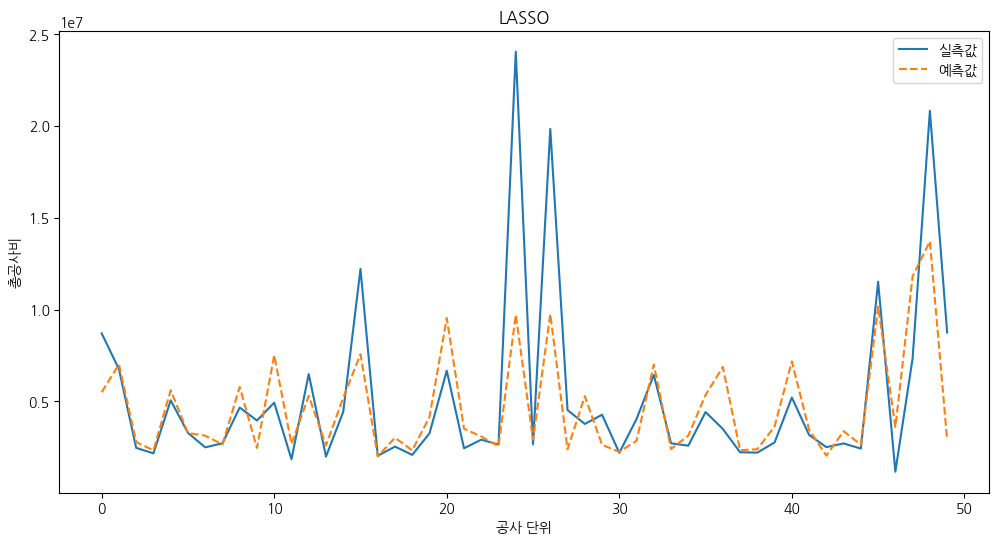

Evaluation: RIDGE
R2_SCORE: 0.525017, MAPE: 30.469559, MSE: 15502448590619.421875, RMSE: 3937314.896045, MAE: 1938511.669281
`RIDGE` object has no attribute `feature_importances_`


/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=1.82262e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


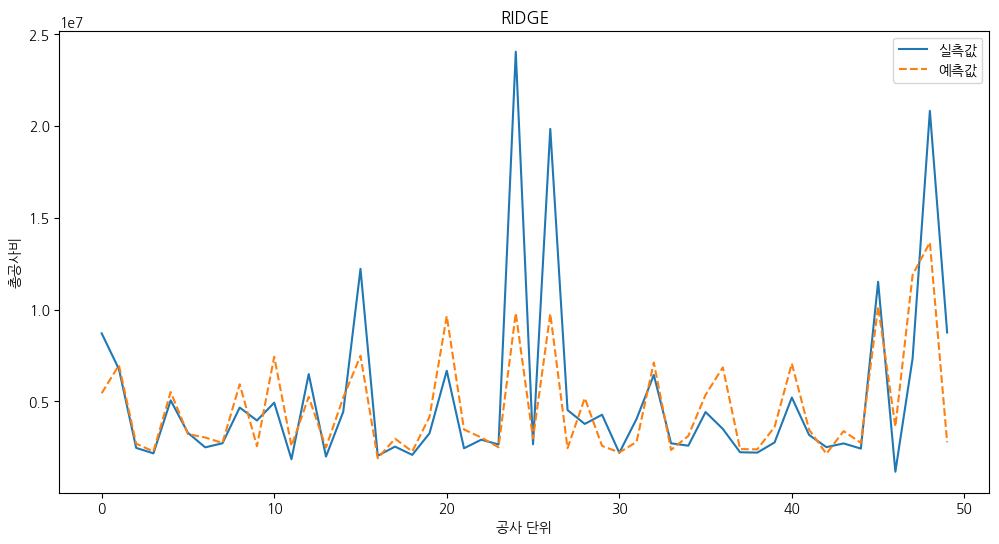

Evaluation: KNR
R2_SCORE: 0.091734, MAPE: 48.591962, MSE: 29643896140154.144531, RMSE: 5444620.844481, MAE: 2764794.143593
`KNR` object has no attribute `feature_importances_`


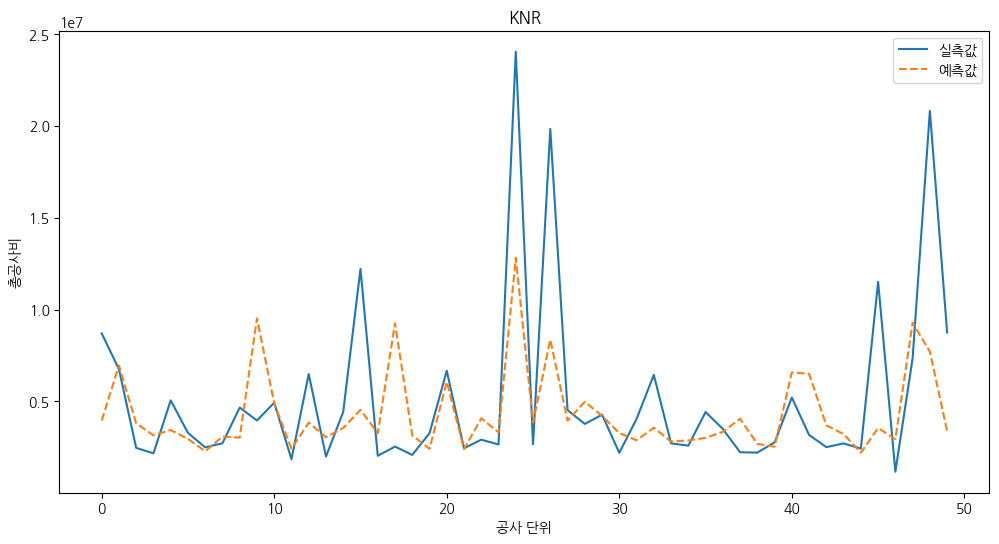

Evaluation: DTR
R2_SCORE: 0.269946, MAPE: 37.613546, MSE: 23827435225309.359375, RMSE: 4881335.393651, MAE: 2224149.872544


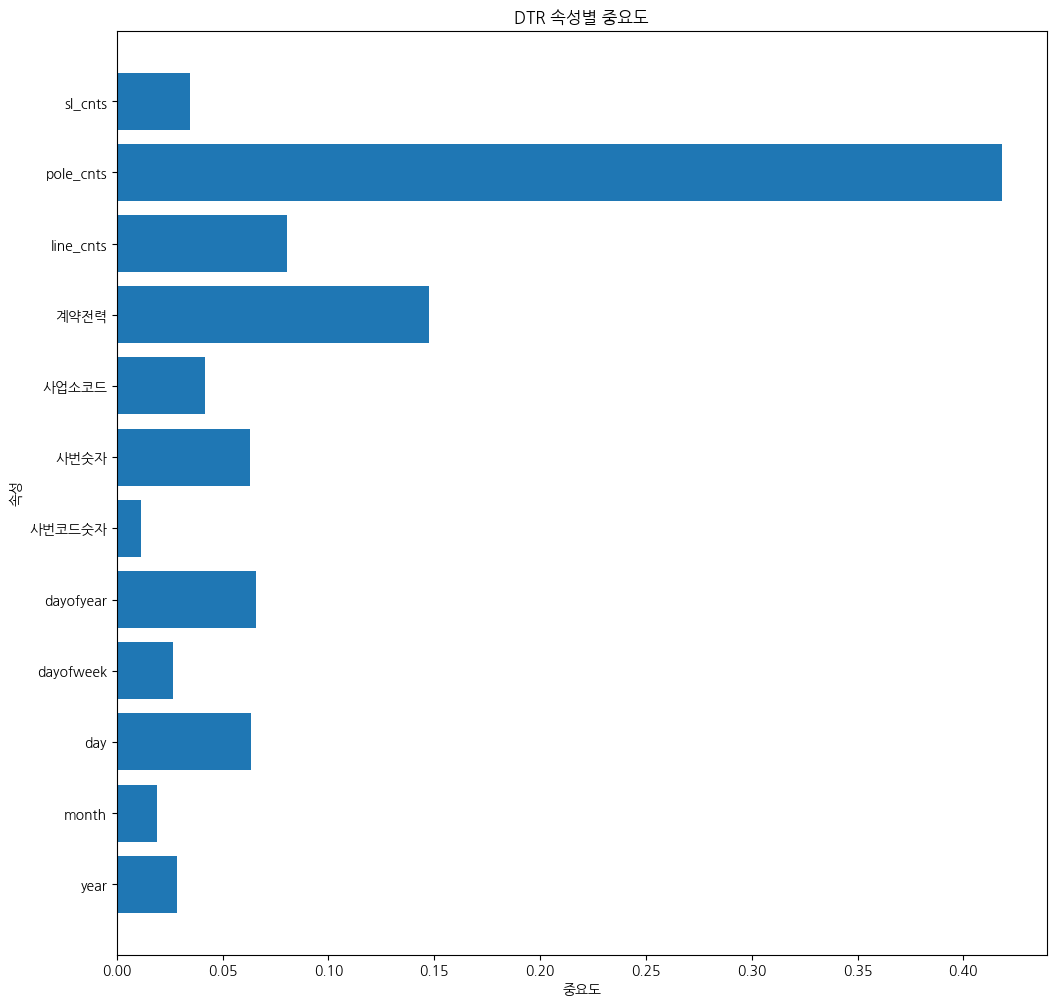

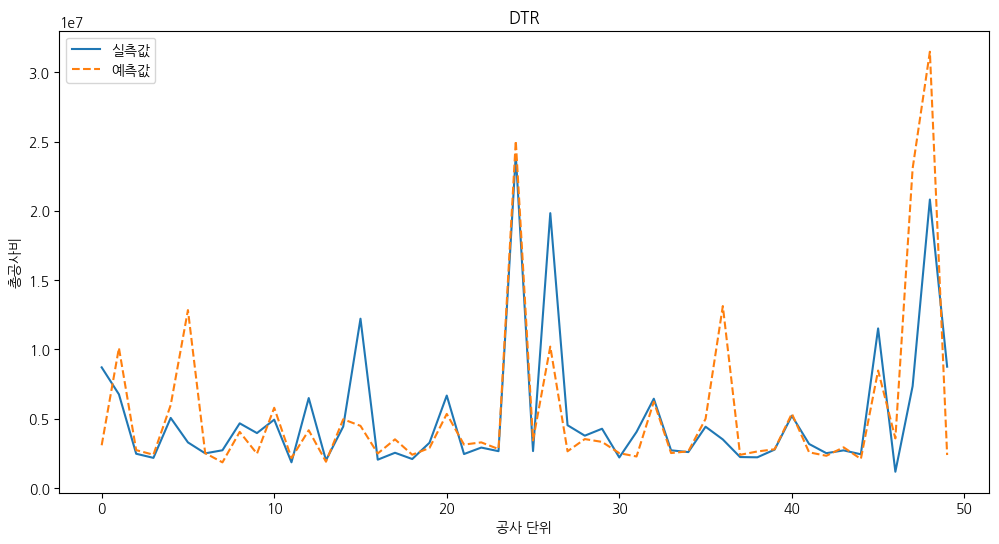

Evaluation: RFR
R2_SCORE: 0.565755, MAPE: 30.640638, MSE: 14172841063174.607422, RMSE: 3764683.394812, MAE: 1808398.991659


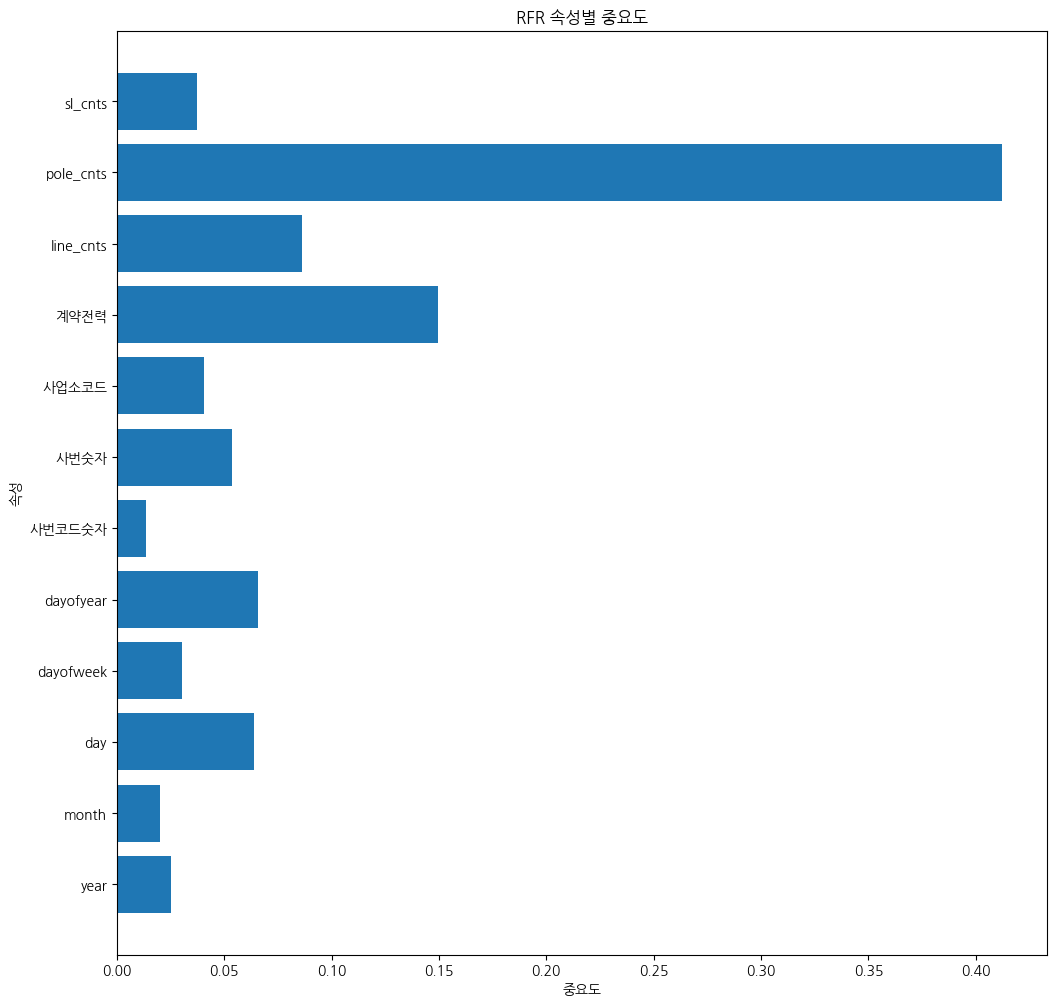

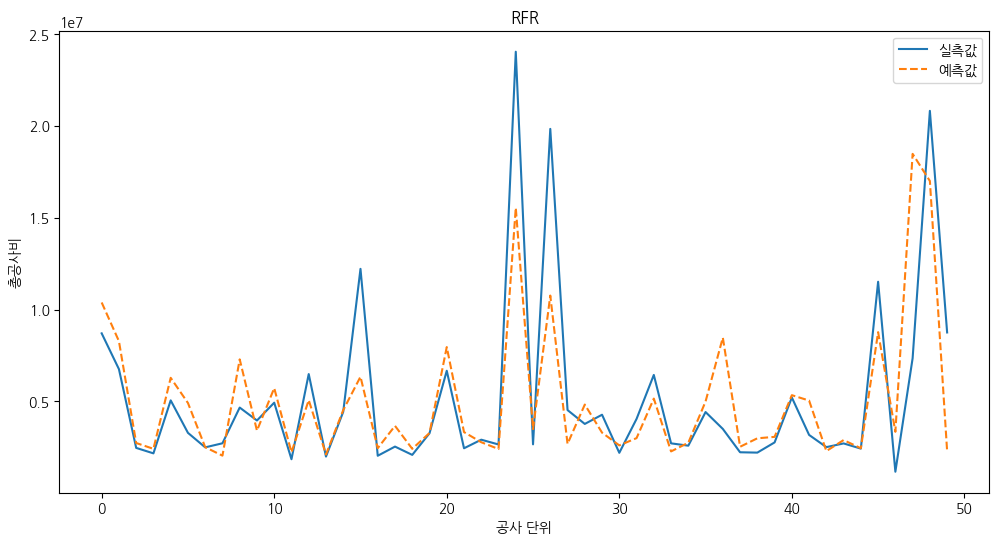

Evaluation: GBR
R2_SCORE: 0.618936, MAPE: 27.727945, MSE: 12437143567400.792969, RMSE: 3526633.460880, MAE: 1668908.443146


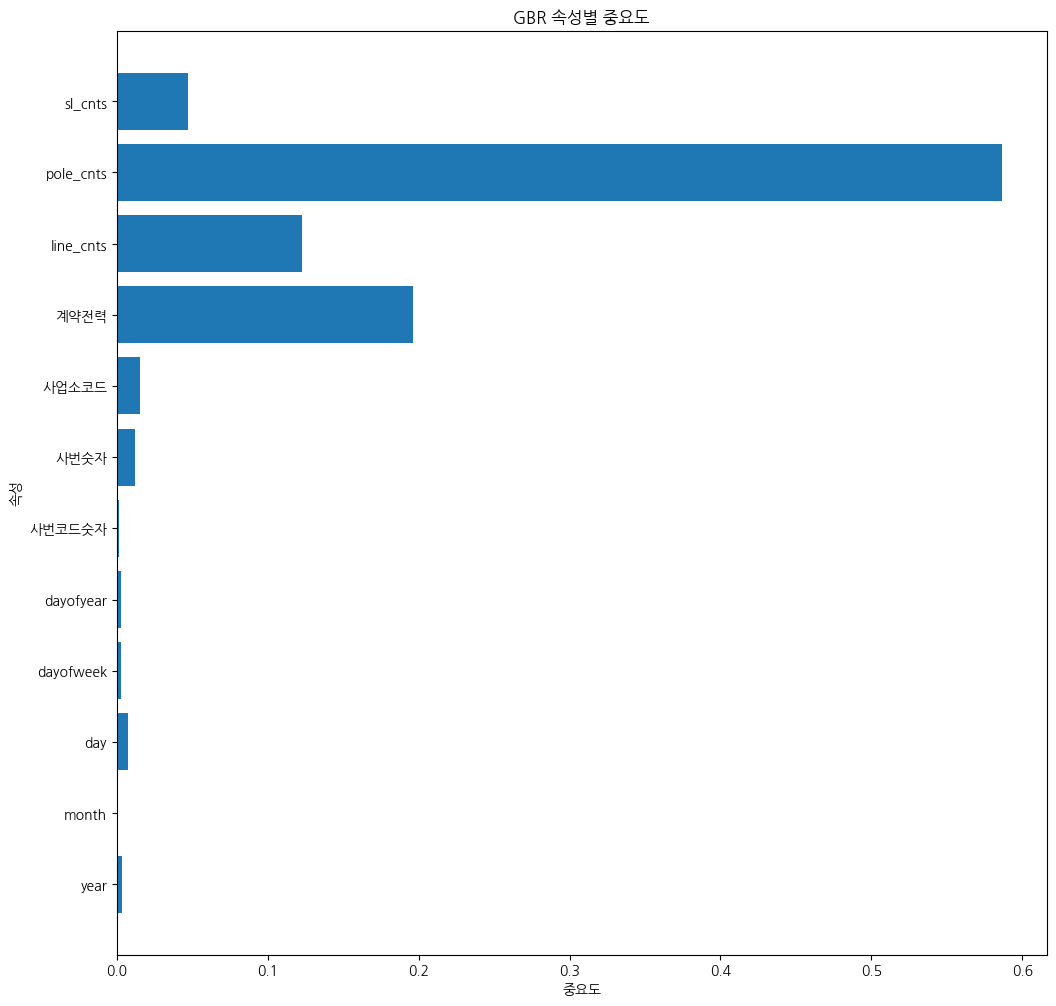

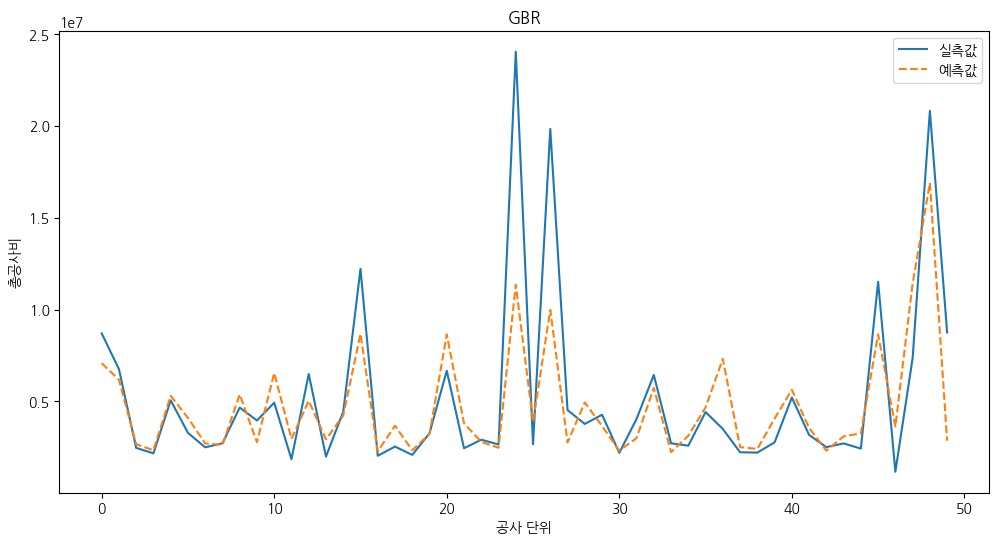

Evaluation: EN
R2_SCORE: 0.519716, MAPE: 30.359231, MSE: 15675468160307.685547, RMSE: 3959225.702117, MAE: 1934427.033355
`EN` object has no attribute `feature_importances_`


/home/freeman/anaconda3/envs/t213p310/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.421e+16, tolerance: 3.967e+13
  model = cd_fast.enet_coordinate_descent(


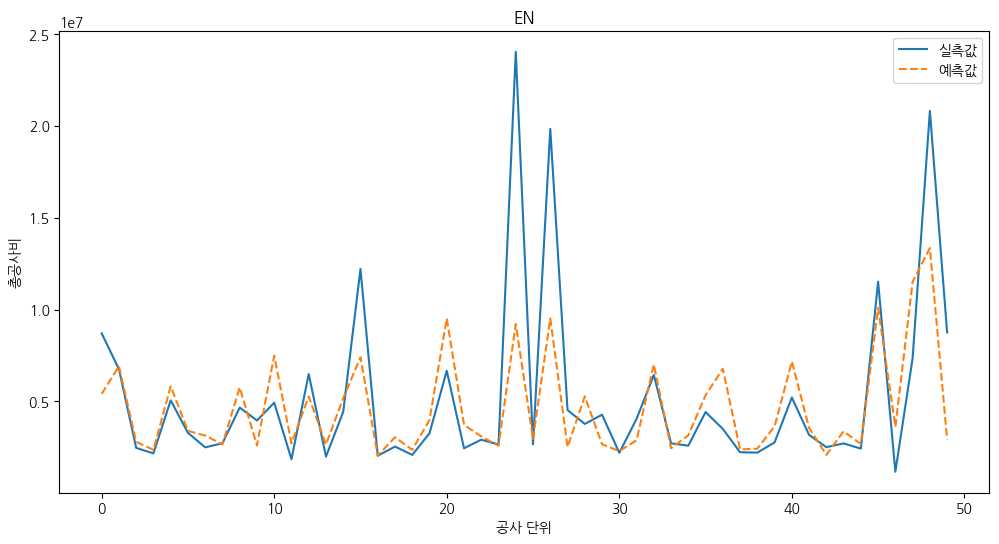

Evaluation: XGR
R2_SCORE: 0.365835, MAPE: 32.240443, MSE: 20697808073040.843750, RMSE: 4549484.374414, MAE: 2246826.680482


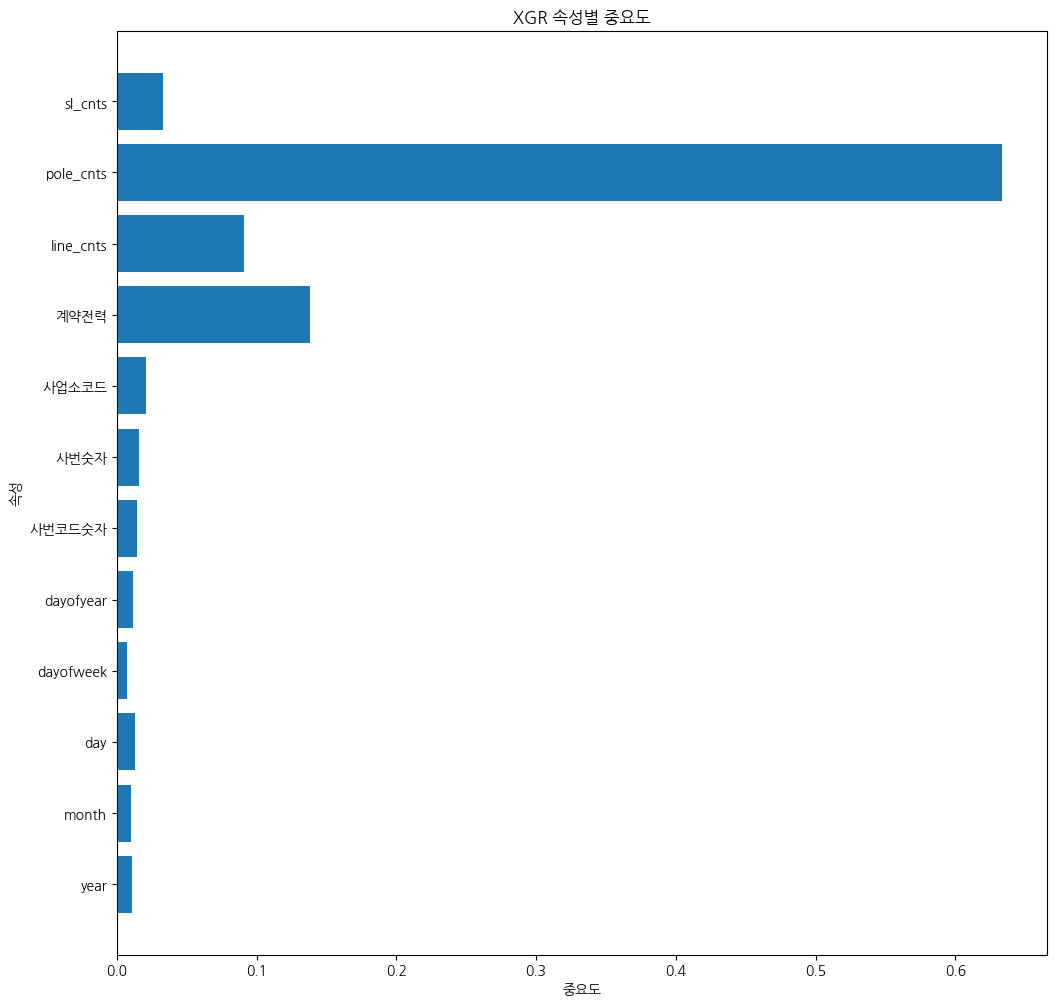

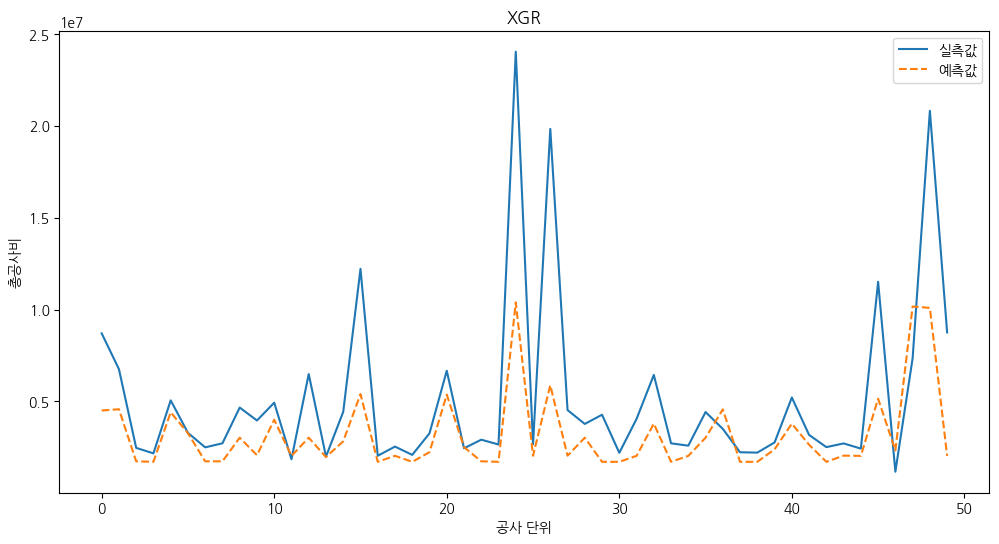

In [10]:
evaluation_values = []
model_names = []
column_names = ['r2score', 'mape', 'mse', 'rmse', 'mae']
for _model_key in ml_models.keys():
    model_fit_and_evaluation(_model_key, display_start=50, display_size=50)
    
df_evaluation = pd.DataFrame(
    evaluation_values, columns=column_names, index=model_names
)

In [11]:
df_evaluation

,r2score,mape,mse,rmse,mae
LASSO,0.524877,0.303917,1.550702e+13,3.937896e+06,1.937503e+06
RIDGE,0.525017,0.304696,1.550245e+13,3.937315e+06,1.938512e+06
KNR,0.091734,0.485920,2.964390e+13,5.444621e+06,2.764794e+06
DTR,0.269946,0.376135,2.382744e+13,4.881335e+06,2.224150e+06
RFR,0.565755,0.306406,1.417284e+13,3.764683e+06,1.808399e+06
GBR,0.618936,0.277279,1.243714e+13,3.526633e+06,1.668908e+06
EN,0.519716,0.303592,1.567547e+13,3.959226e+06,1.934427e+06
XGR,0.365835,0.322404,2.069781e+13,4.549484e+06,2.246827e+06
